In [30]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from datetime import date

In [2]:
os.getcwd()

'C:\\Users\\Abhay\\Desktop\\DS Class Notes\\Python\\3. Pandas Case Study 1 - Retail Case Study'

In [3]:
customer = pd.read_csv("Customer.csv")
prod_info = pd.read_csv("prod_cat_info.csv")
transaction = pd.read_csv("Transactions.csv")

# 1. Merge all three datasets. Ensure to keep all the customers who have done transaction with us and select join type accordingly.


In [4]:
Cust_sem = pd.merge(left= customer,
                     right= transaction,
                     left_on='customer_Id',
                     right_on = 'cust_id',
                     how = 'inner')

In [5]:
Cust_sem.head()

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop
1,268408,02-01-1970,M,4.0,16197868036,268408,16-12-2013,1,4,-5,-210,110.250,-1160.250,Flagship store
2,268408,02-01-1970,M,4.0,16197868036,268408,12/12/2013,1,4,5,210,110.250,1160.250,Flagship store
3,268408,02-01-1970,M,4.0,28810141075,268408,2/9/2013,10,6,2,813,170.730,1796.730,TeleShop
4,268408,02-01-1970,M,4.0,64633435931,268408,6/5/2013,4,2,3,312,98.280,1034.280,Flagship store


In [5]:
Cust_Final = pd.merge(left = Cust_sem,
                     right = prod_info,
                     left_on=['prod_cat_code','prod_subcat_code'],
                     right_on=['prod_cat_code','prod_sub_cat_code'],
                     how= 'inner')

In [8]:
Cust_Final

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,7,Fiction
1,275152,16-01-1970,M,4.0,73109425404,275152,25-03-2011,7,5,2,464,97.440,1025.440,e-Shop,Books,7,Fiction
2,275034,18-01-1970,F,4.0,64777271023,275034,23-05-2011,7,5,2,197,41.370,435.370,Flagship store,Books,7,Fiction
3,270829,22-01-1970,F,8.0,87174343938,270829,9/12/2013,7,5,4,1141,479.220,5043.220,e-Shop,Books,7,Fiction
4,267657,29-01-1970,F,7.0,76242744953,267657,23-05-2013,7,5,4,1020,428.400,4508.400,e-Shop,Books,7,Fiction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,267812,04-12-1992,F,1.0,63540378797,267812,10/10/2012,10,5,3,224,70.560,742.560,TeleShop,Books,10,Non-Fiction
23049,274618,09-12-1992,F,7.0,71793203305,274618,17-08-2013,10,5,4,691,290.220,3054.220,Flagship store,Books,10,Non-Fiction
23050,268097,15-12-1992,F,7.0,91217108818,268097,1/2/2012,10,5,2,411,86.310,908.310,e-Shop,Books,10,Non-Fiction
23051,268097,15-12-1992,F,7.0,90114483354,268097,31-01-2011,10,5,-4,-1408,591.360,-6223.360,e-Shop,Books,10,Non-Fiction


# 2. Prepare summary report for the merged dataset
## a. Get column names and their corresponding data types.

In [6]:
Cust_Final.dtypes

customer_Id            int64
DOB                   object
Gender                object
city_code            float64
transaction_id         int64
cust_id                int64
tran_date             object
prod_subcat_code       int64
prod_cat_code          int64
Qty                    int64
Rate                   int64
Tax                  float64
total_amt            float64
Store_type            object
prod_cat              object
prod_sub_cat_code      int64
prod_subcat           object
dtype: object

## b. Top and Bottom 10 observations.

In [7]:
Cust_Final.head(10)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,7,Fiction
1,275152,16-01-1970,M,4.0,73109425404,275152,25-03-2011,7,5,2,464,97.440,1025.440,e-Shop,Books,7,Fiction
2,275034,18-01-1970,F,4.0,64777271023,275034,23-05-2011,7,5,2,197,41.370,435.370,Flagship store,Books,7,Fiction
3,270829,22-01-1970,F,8.0,87174343938,270829,9/12/2013,7,5,4,1141,479.220,5043.220,e-Shop,Books,7,Fiction
4,267657,29-01-1970,F,7.0,76242744953,267657,23-05-2013,7,5,4,1020,428.400,4508.400,e-Shop,Books,7,Fiction
5,274630,01-02-1970,M,4.0,78357345891,274630,11/4/2012,7,5,1,646,67.830,713.830,TeleShop,Books,7,Fiction
6,273541,01-02-1970,M,4.0,23916816961,273541,9/2/2013,7,5,4,410,172.200,1812.200,e-Shop,Books,7,Fiction
7,269008,13-02-1970,F,6.0,35560569829,269008,9/3/2013,7,5,1,1441,151.305,1592.305,e-Shop,Books,7,Fiction
8,269008,13-02-1970,F,6.0,94033312891,269008,26-04-2012,7,5,5,746,391.650,4121.650,MBR,Books,7,Fiction
9,267199,14-02-1970,NaN,2.0,56749259881,267199,11/1/2012,7,5,4,1049,440.580,4636.580,MBR,Books,7,Fiction


In [8]:
Cust_Final.tail(10)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
23043,268914,15-11-1992,F,3.0,1407823655,268914,10/6/2011,10,5,1,1252,131.460,1383.460,MBR,Books,10,Non-Fiction
23044,269519,17-11-1992,M,9.0,29719500605,269519,24-12-2013,10,5,4,1036,435.120,4579.120,TeleShop,Books,10,Non-Fiction
23045,273524,25-11-1992,F,1.0,25762805863,273524,19-11-2012,10,5,1,1401,147.105,1548.105,Flagship store,Books,10,Non-Fiction
23046,272141,02-12-1992,F,10.0,71337087467,272141,22-07-2012,10,5,-3,-1422,447.930,-4713.930,e-Shop,Books,10,Non-Fiction
23047,272141,02-12-1992,F,10.0,71337087467,272141,16-07-2012,10,5,3,1422,447.930,4713.930,e-Shop,Books,10,Non-Fiction
23048,267812,04-12-1992,F,1.0,63540378797,267812,10/10/2012,10,5,3,224,70.560,742.560,TeleShop,Books,10,Non-Fiction
23049,274618,09-12-1992,F,7.0,71793203305,274618,17-08-2013,10,5,4,691,290.220,3054.220,Flagship store,Books,10,Non-Fiction
23050,268097,15-12-1992,F,7.0,91217108818,268097,1/2/2012,10,5,2,411,86.310,908.310,e-Shop,Books,10,Non-Fiction
23051,268097,15-12-1992,F,7.0,90114483354,268097,31-01-2011,10,5,-4,-1408,591.360,-6223.360,e-Shop,Books,10,Non-Fiction
23052,268097,15-12-1992,F,7.0,90114483354,268097,26-01-2011,10,5,4,1408,591.360,6223.360,e-Shop,Books,10,Non-Fiction


## c. "Five number summary" for all continous variables (min,Q1,mean,Q3,max)

In [9]:
cont_var = Cust_Final[['Qty','Rate','Tax','total_amt']]


In [10]:
# MIN
cont_var.min(axis=0)

Qty            -5.000
Rate        -1499.000
Tax             7.350
total_amt   -8270.925
dtype: float64

In [11]:
# Q1
cont_var.quantile(0.25)

Qty            1.00
Rate         312.00
Tax           98.28
total_amt    762.45
Name: 0.25, dtype: float64

In [12]:
# MEAN
cont_var.mean()

Qty             2.432395
Rate          636.369713
Tax           248.667192
total_amt    2107.308002
dtype: float64

In [13]:
# Q3
cont_var.quantile(0.75)

Qty             4.000
Rate         1109.000
Tax           365.715
total_amt    3569.150
Name: 0.75, dtype: float64

In [14]:
# MAX
cont_var.max(axis = 0)

Qty             5.0
Rate         1500.0
Tax           787.5
total_amt    8287.5
dtype: float64

## d. Frequency table for all categorical variables

In [10]:
#Gender
GenderCross = pd.crosstab(index= Cust_Final['Gender'], columns='count')
GenderCross

col_0,count
Gender,
F,11233
M,11811


In [16]:
# StoreType
StoreTypeFreq = pd.crosstab(index=Cust_Final['Store_type'], columns='count')
StoreTypeFreq

col_0,count
Store_type,
Flagship store,4577
MBR,4661
TeleShop,4504
e-Shop,9311


In [17]:
#ProdCat
prodCatFreq = pd.crosstab(index= Cust_Final['prod_cat'], columns='count')
prodCatFreq

col_0,count
prod_cat,
Bags,1998
Books,6069
Clothing,2960
Electronics,4898
Footwear,2999
Home and kitchen,4129


In [18]:
#ProdSubCat
prodsubcatFreq = pd.crosstab(index= Cust_Final['prod_subcat'], columns='count')
prodsubcatFreq

col_0,count
prod_subcat,
Academic,967
Audio and video,952
Bath,1023
Cameras,985
Children,1035
Comics,1031
Computers,958
DIY,989
Fiction,1043


# 3. Generate histograms for continous variables and frequency bars for categorical variables


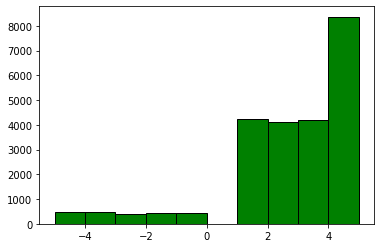

In [29]:
# histograms for continous variables
plt.hist(Cust_Final['Qty'], color = 'Green' ,edgecolor = 'black')
plt.show()

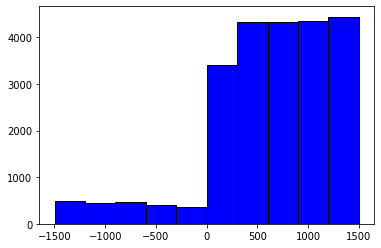

In [34]:
plt.hist(Cust_Final['Rate'], color = 'Blue', edgecolor = 'black')
plt.show()

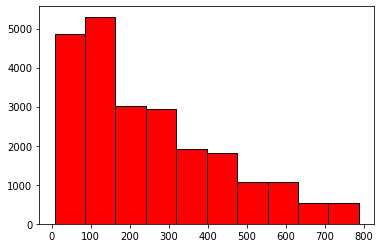

In [37]:
plt.hist(Cust_Final['Tax'], color = 'red', edgecolor = 'black')
plt.show()

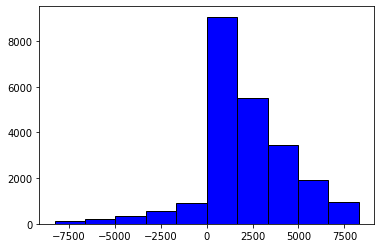

In [36]:
plt.hist(Cust_Final['total_amt'], color = 'Blue', edgecolor = 'black')
plt.show()

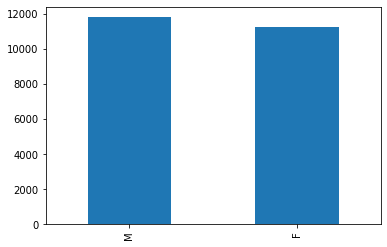

In [44]:
# Frequency Bar for categorical variables
Cust_Final['Gender'].value_counts().plot(kind = 'bar')

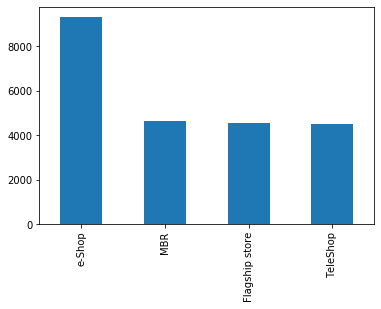

In [45]:
Cust_Final['Store_type'].value_counts().plot(kind = 'bar')

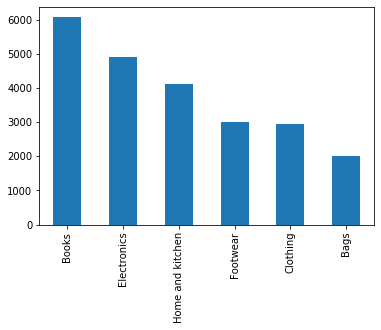

In [46]:
Cust_Final['prod_cat'].value_counts().plot(kind = 'bar')

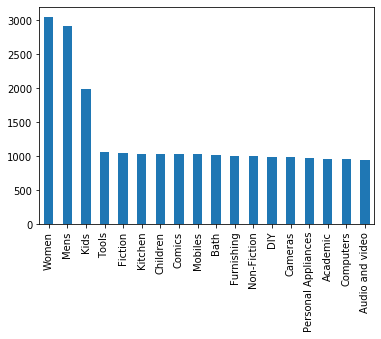

In [47]:
Cust_Final['prod_subcat'].value_counts().plot(kind = 'bar')

# 4. Calculate the following information using the merged dataset
## a. Time period of the available transaction data

In [15]:
Cust_Final['tran_date'] = pd.to_datetime(Cust_Final['tran_date'])

In [19]:
days =  Cust_Final['tran_date'].max() - Cust_Final['tran_date'].min()
days.days

1430

## b. Count the number of transaction where the total_amt is negative

In [22]:
Cust_Final.tran_date[Cust_Final.total_amt < 0].count()

2177

# 5. Analyze which product categories are popular amoung female vs male customers.

In [57]:
# For Males
MCAT= Cust_Final.loc[Cust_Final.Gender == "M"]
prod = MCAT.groupby(['prod_cat']).Gender.count()
prod = pd.DataFrame(prod)
prod

,Gender
prod_cat,
Bags,1004
Books,3116
Clothing,1518
Electronics,2570
Footwear,1469
Home and kitchen,2134


In [51]:
prod.nlargest(1,'Gender')

,Gender
prod_cat,
Books,3116


In [55]:
# For Females
FCAT= Cust_Final.loc[Cust_Final.Gender == "F"]
prodF = FCAT.groupby(['prod_cat']).Gender.count()
prodF = pd.DataFrame(prodF)
prodF

,Gender
prod_cat,
Bags,994
Books,2949
Clothing,1439
Electronics,2328
Footwear,1529
Home and kitchen,1994


In [56]:
prodF.nlargest(1,'Gender')

,Gender
prod_cat,
Books,2949


# 6. Which city code has maximum customers and what was the percentage of customers from that city?


In [72]:
CtCode = Cust_Final.groupby(['city_code']).customer_Id.count()
CtCode = pd.DataFrame(CtCode)
CtCode['percentage'] = (CtCode['customer_Id'] / CtCode['customer_Id'].sum()) * 100 
CtCode.nlargest(1, 'percentage')

,customer_Id,percentage
city_code,,
4.0,2422,10.509872


# 7. Which store type sells maximum products by value and by quantity?

In [81]:
STsum= pd.DataFrame(Cust_Final.groupby('Store_type').total_amt.sum())
STsum

,total_amt
Store_type,
Flagship store,9.715688e+06
MBR,9.674486e+06
TeleShop,9.364781e+06
e-Shop,1.982482e+07


In [83]:
# By Value
STsum.nlargest(1,'total_amt')

,total_amt
Store_type,
e-Shop,19824816.05


In [87]:
STqty = pd.DataFrame(Cust_Final.groupby('Store_type').Qty.sum())
STqty

,Qty
Store_type,
Flagship store,11133
MBR,11194
TeleShop,10984
e-Shop,22763


In [90]:
#By Quantity
STqty.nlargest(1,'Qty')

,Qty
Store_type,
e-Shop,22763


# 8. What was the total amount earned from the 'Electronics' and 'Clothing' categories from Flagship Stores?

In [10]:
tm1 = Cust_Final[(Cust_Final.Store_type == 'Flagship store') & Cust_Final.prod_cat.isin(['Electronics','Clothing'])]
tm_amt = tm1.total_amt.sum()
tm_amt

3409559.27

# 9. What was the total amout earned from Male customers under 'Electronics' category?


In [15]:
C1 = Cust_Final[(Cust_Final.Gender == 'M') & (Cust_Final.prod_cat == 'Electronics')]
C1_amt = C1.total_amt.sum()
C1_amt

5703109.425

# 10. How many customer have more than 10 unique transactions, after removing all transactions which have negative amount?

In [26]:
pos_tran = Cust_Final[Cust_Final.total_amt > 0]
count =pd.DataFrame(pos_tran.groupby('customer_Id').total_amt.count())
count1 = count[count.total_amt > 10].count()
count1

total_amt    6
dtype: int64

# 11. For all customers aged between 25 - 35 , find out :
## a. What was the total amout spend for 'Electronics' and 'Books' product categories?


In [63]:
today = date.today()
currYear = today.year
Cust_Final['DOB'] = pd.to_datetime(Cust_Final['DOB'])

Cust_Final['Birthyear'] = pd.DatetimeIndex(Cust_Final['DOB']).year
Cust_Final['Age'] = currYear - Cust_Final['Birthyear']
CustAmt = Cust_Final[(Cust_Final.Age < 35) & (Cust_Final.Age > 25)]

In [64]:
Custamt1 = CustAmt[CustAmt.prod_cat.isin(['Electronics','Books'])]
Custamt1['total_amt'].sum()

7041794.825